# Curso de Big Data

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Miércoles 4 de octubre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- También deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/11nJY1Frgla45sTgsPiSeOZM9iBM-XRWh/edit?usp=sharing&ouid=105815768529474116534&rtpof=true&sd=true
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se  corregirán sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

In [1]:
#Ejerecicio 1
import requests #Importamos el paquete requests para trabajar APIs
import pandas as pd #Importamos el paquete pandas para trabajar data frames
import matplotlib.pyplot as plt #Importamos la función pyplot de matplotlib para trabajar los gráficos

In [2]:
buscar = "Libro Big Data Walter Sosa Escudero" #Definimos la variable buscar con el objeto que vamos a buscar
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20")) #Defimos el url de la API que queremos buscar incluyendo el objeto y reemplazamos los espacios por %20
response = requests.request("GET", url) #Realizamos la busqueda y guardamos los resultados en response
data = response.json() #Creamos un diccionario json con los resultados encontrados

In [3]:
#Ejercicio 2
data_frame = pd.DataFrame(data['results']) #A partir de los resultados construimos un dataframe 

promedio = data_frame['price'].mean() #Calculamos el promedio del precio y lo almacenamos en la variable promedio
minimo = min(data_frame['price']) #Calculamos el precio mínimo y lo almacenamos en la variable minimo
maximo = max(data_frame['price']) #Calculamos el precio máximo y lo almacenamos en la variable maximo

print('El precio promedio es', promedio) #Imprimimos el promedio
print('El precio mínimo es', minimo) #Imprimimos el mínimo
print('El precio máximo es', maximo) #Imprimimos el máximo


El precio promedio es 7124.74
El precio mínimo es 2860
El precio máximo es 17970


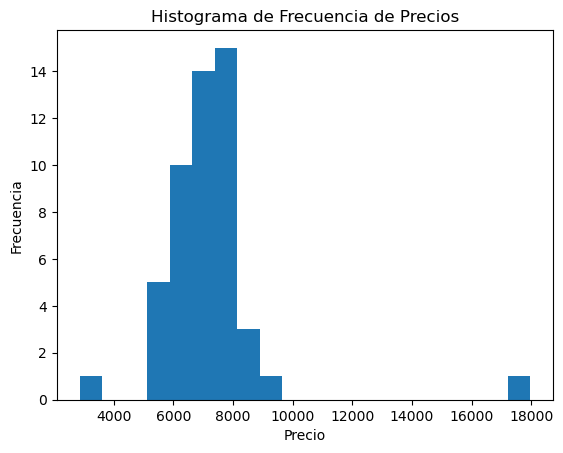

In [4]:
#Ejercicio 3
histogram = data_frame['price'].plot.hist(bins = 20) #Creamos un histograma de los precios y los guardamos en histogram
plt.title('Histograma de Frecuencia de Precios')
plt.xlabel('Precio') #Agregamos nombre al eje X
plt.ylabel('Frecuencia') #Agregamos nombre al eje Y
plt.show() #Imprimimos el histograma


#Vemos dos outliers, que representan tanto el mínimo como el máximo de nuestros datos.
#El máximo se encuentra radicalmente más alejado, mientras que el mínimo, si bien está alejado de los valores centrales, permanece más próximo. 